# Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name='mnist_784', version=1, parser='auto')

In [2]:
x, y = mnist['data'], mnist['target']

In [3]:
x.shape

(70000, 784)

In [4]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

some_digit = x.iloc[36001]
some_digit_image = some_digit.values.reshape(28,28)

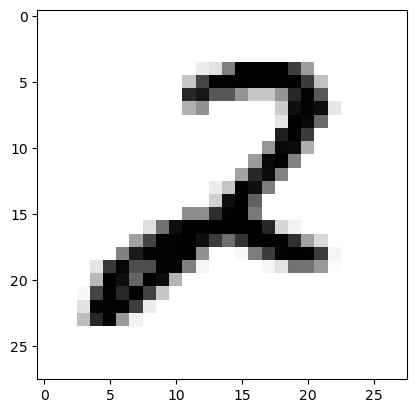

In [5]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("image")
plt.show()

In [6]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [7]:
import numpy as np
shuffled_index = np.random.permutation(60000)
x_train, y_train = x_train.loc[shuffled_index], y_train.loc[shuffled_index]

## Creating a digit detector

In [8]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(tol=0.1)

In [11]:
clf.fit(x_train, y_train_2)


E:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [12]:
clf.predict([some_digit])

E:\Python\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

## Cross Validation

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

E:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:

In [18]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating Confusion Matrix


In [14]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_train_2, y_train_pred)

array([[53539,   503],
       [  825,  5133]], dtype=int64)

 ## Precision and Recall

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_2, y_train_pred)

0.9107523066004258

In [22]:
recall_score(y_train_2, y_train_pred)

0.8615307150050352

## F1-Score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

0.8854579955149214

## Precision Recall Curve

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_train_pred)

In [28]:
precisions

array([0.0993    , 0.91075231, 1.        ])

In [29]:
recalls

array([1.        , 0.86153072, 0.        ])